In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mchandak/DS_Repo10/main/Data/NewspaperData.csv")
data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [3]:
data.corr()

C:\Users\ManojC\AppData\Local\Temp\ipykernel_8004\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


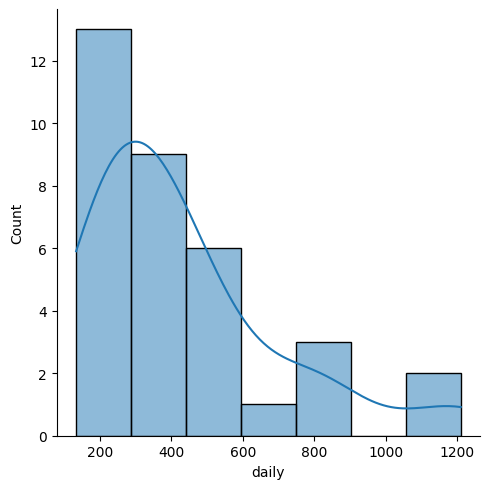

In [4]:
import seaborn as sns
sns.displot(data['daily'],kde=True);

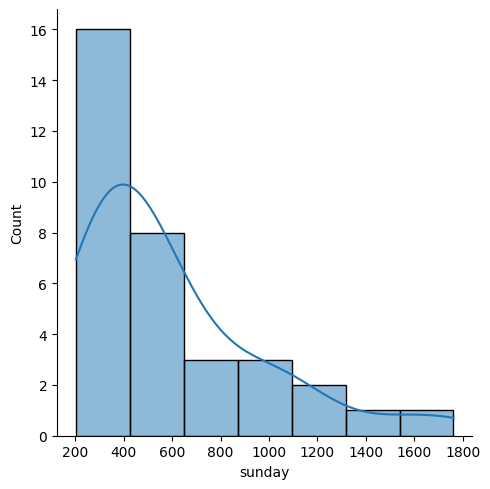

In [5]:
import seaborn as sns
sns.displot(data['sunday'],kde=True);

Fitting a Linear Regression Model

In [6]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 02 May 2023   Prob (F-statistic):           6.02e-19
Time:                        09:03:29   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

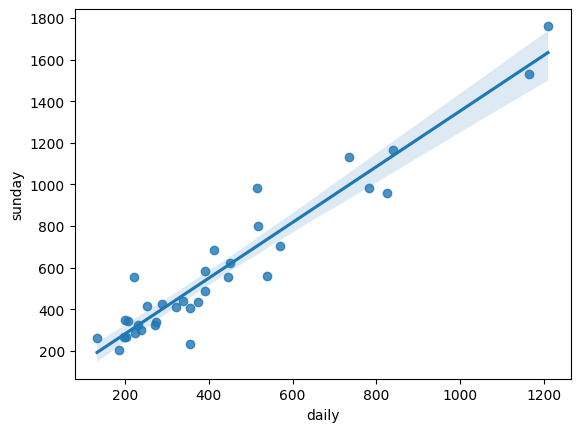

In [10]:
sns.regplot(x="daily", y="sunday", data=data);

In [11]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [18]:
#1100
(1.34*1100)+13.835630

1487.83563

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    
# print(f'model t-values:\n{model.tvalues}\n-----------------\nmodel p-values: \n{model.pvalues}')    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [15]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [16]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [17]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64